# Imports

In [51]:
from matplotlib import pyplot as plt

import numpy as np

# Random walk

In [52]:
from random import choice


class RandomWalk:
    
    def __init__(self, num_points=500):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        
        while len(self.x_values) < self.num_points:
        
            x_direction = choice([1, -1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance
            
            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance
            
        
            if x_step == 0 and y_step == 0:
                continue
            
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step
            
            self.x_values.append(x)
            self.y_values.append(y)

# Generating random walk

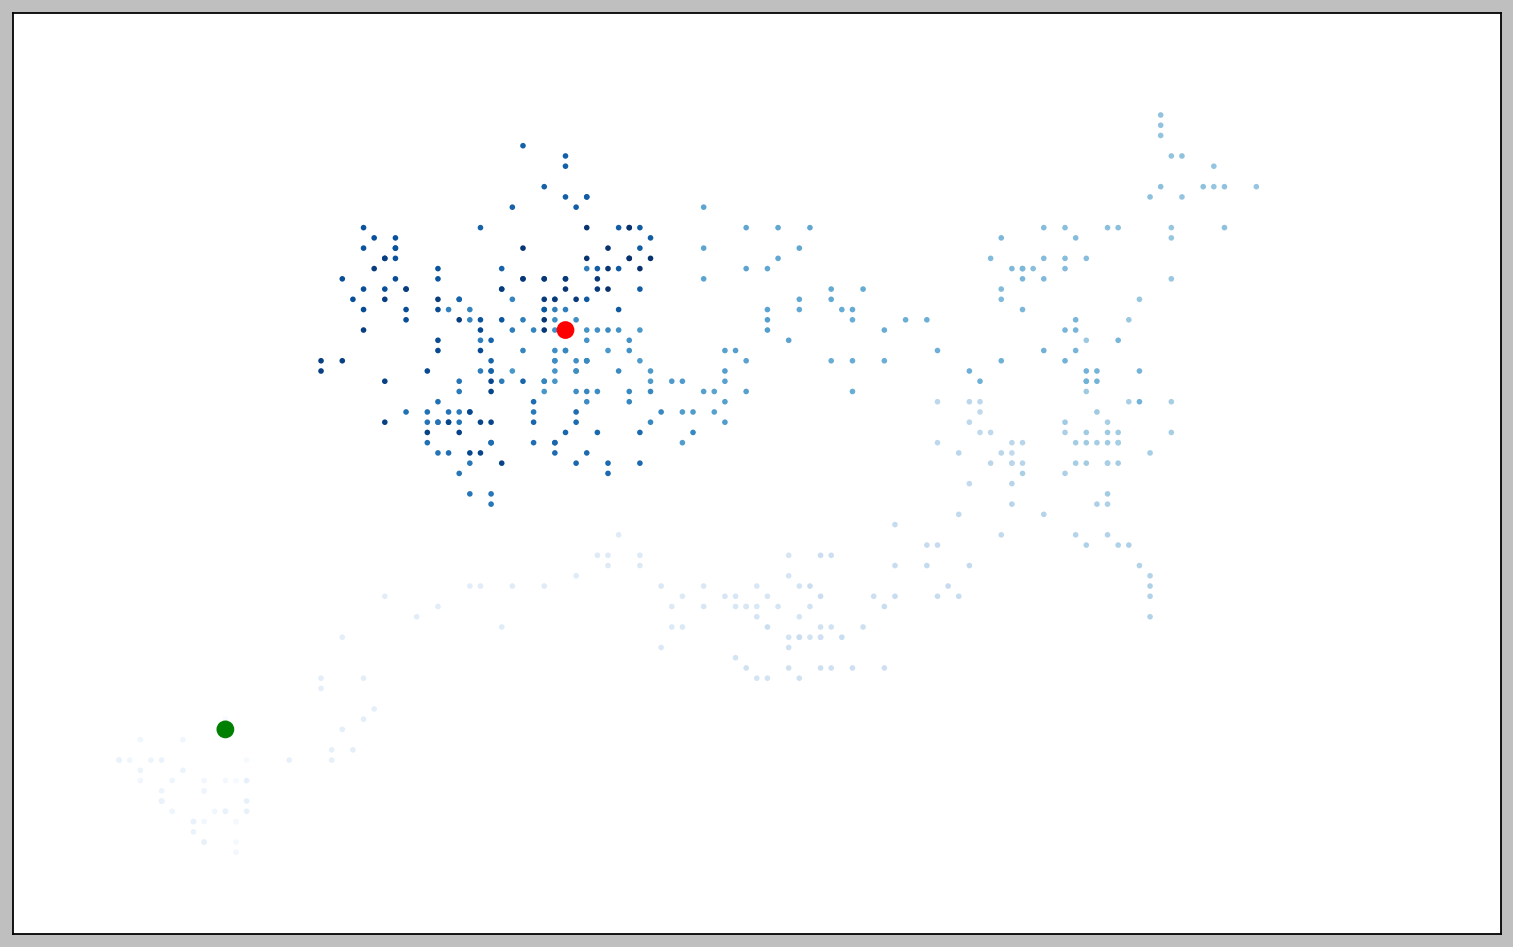

In [53]:
from matplotlib import pyplot as plt


rw = RandomWalk(500)
rw.fill_walk()

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(15, 9), dpi=128)

point_numbers = range(rw.num_points)

ax.scatter(
    rw.x_values,
    rw.y_values,
    c=point_numbers,
    cmap=plt.cm.Blues,
    edgecolors='none',
    s=10
)

ax.scatter(
    0,
    0,
    c='green',
    edgecolors='none',
    s=100
)

ax.scatter(
    rw.x_values[-1],
    rw.y_values[-1],
    c='red',
    edgecolors='none',
    s=100
)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

# Style sheet

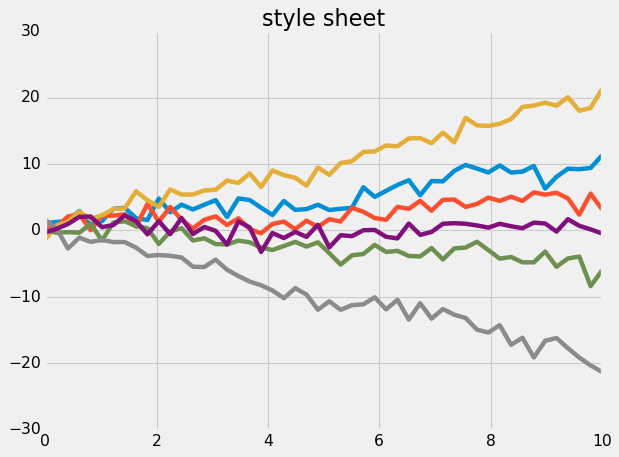

In [54]:
from matplotlib import pyplot as plt

import numpy as np


np.random.seed(19680801)
x = np.linspace(0, 10)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("style sheet")

plt.show()

# Basic pie chart

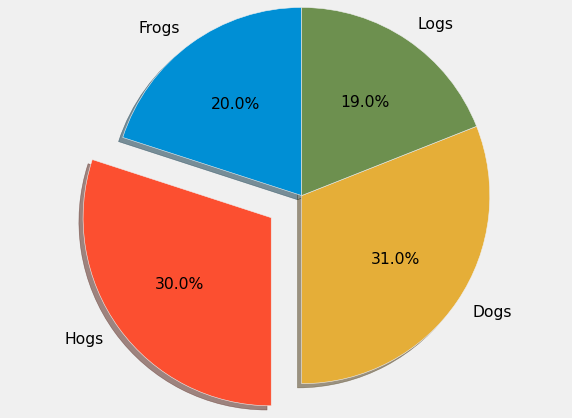

In [55]:
from matplotlib import pyplot as plt


labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [20, 30, 31, 19]
explode = (0, 0.2, 0, 0)  
fig1, ax = plt.subplots()

ax.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90
)
ax.axis('equal')  

plt.show()

# Bar chart on polar axis

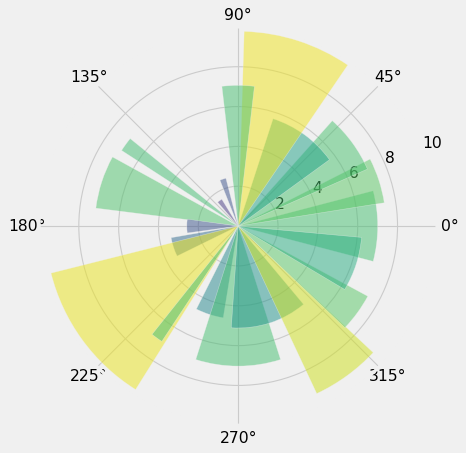

In [56]:
from matplotlib import pyplot as plt

import numpy as np


np.random.seed(19680801)
N = 20

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

# 3D voxel plot 

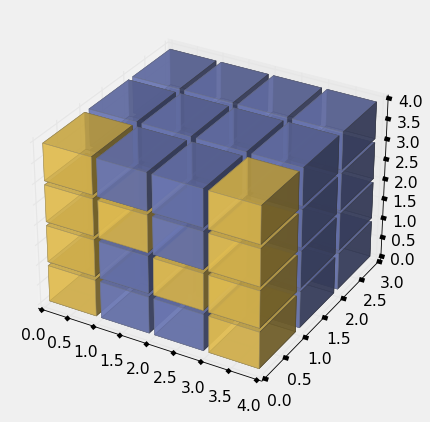

In [57]:
from matplotlib import pyplot as plt

import numpy as np


def explode(data):
    size = np.array(data.shape) * 2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e


n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True

facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2

x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()